# Drawing Conclusions Quiz
Use the space below to explore `store_data.csv` to answer the quiz questions below.

In [546]:
# imports and load data
import pandas as pd
un_df= pd.read_csv('store_data.csv')
df = pd.read_csv('store_data.csv')
df.head()

,week,storeA,storeB,storeC,storeD,storeE
0,2014-05-04,2643,8257,3893,6231,1294
1,2014-05-11,6444,5736,5634,7092,2907
2,2014-05-18,9646,2552,4253,5447,4736
3,2014-05-25,5960,10740,8264,6063,949
4,2014-06-01,7412,7374,3208,3985,3023


## Explore data

In [547]:
#data shape
print(df.shape)
#data info
print(df.dtypes)

(200, 6)
week      object
storeA     int64
storeB     int64
storeC     int64
storeD     int64
storeE     int64
dtype: object


In [548]:
# parse week as date
df['week']=pd.to_datetime(df['week'])
print(df.dtypes)

week      datetime64[ns]
storeA             int64
storeB             int64
storeC             int64
storeD             int64
storeE             int64
dtype: object


In [552]:
# check for nulls
print(df.isnull().any())

week      False
storeA    False
storeB    False
storeC    False
storeD    False
storeE    False
dtype: bool


In [553]:
# summary statisctics
print(df.describe())

             storeA        storeB       storeC       storeD       storeE
count    200.000000    200.000000   200.000000   200.000000   200.000000
mean    5865.480000   6756.710000  4942.105000  5431.405000  2580.025000
std     2958.230318   3601.339489  1325.407768  1183.111323  1725.651381
min      137.000000     14.000000   927.000000  2276.000000    39.000000
25%     3812.250000   3884.500000  4053.500000  4717.000000  1235.000000
50%     5713.500000   6771.000000  4962.500000  5382.000000  2522.000000
75%     7662.250000   9350.500000  5801.750000  6243.750000  3574.250000
max    14403.000000  15841.000000  8293.000000  8190.000000  7553.000000


## Draw Conclusions

### total sales for the last month


In [508]:
# mask last month sales
print(df.tail(2))
# fileter dates
df_last_month_sales=df[df['week']>='2018-02-01']
(df_last_month_sales)

          week  storeA  storeB  storeC  storeD  storeE
198 2018-02-18    3512    7511    4151    5596    3501
199 2018-02-25    7560    6904    3569    5045    2585


,week,storeA,storeB,storeC,storeD,storeE
196,2018-02-04,4853,6503,4187,5956,1458
197,2018-02-11,9202,3677,4540,6186,243
198,2018-02-18,3512,7511,4151,5596,3501
199,2018-02-25,7560,6904,3569,5045,2585


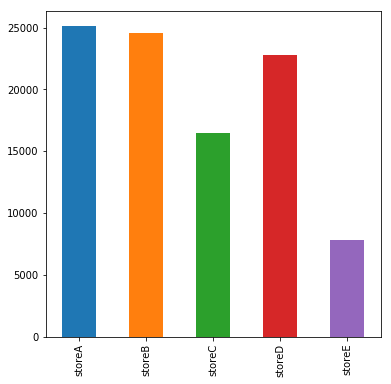

In [595]:
#plot last month sales
df_last_month_sales.sum().plot(kind='bar', figsize=(6,6));

In [584]:
# help(df_last_month_sales.sum().plot/

In [626]:
# aggregate total sales for month

max_sales = df_last_month_sales.sum().max()

last_month_sales = df_last_month_sales.sum().sort_values

highest_storeSales= dict(df_last_month_sales.sum())

highest_storeSales= list(highest_storeSales.keys())[list(highest_storeSales.values()).index(max_sales)]

print(f'\nStore with highest sales last month is {highest_storeSales} @ {max_sales} ')

lastMonth_generalSales=sum(df_last_month_sales.sum().values)
print('\nGeneral Sales last month {}'.format(lastMonth_generalSales))


Store with highest sales last month is storeA @ 25127 

General Sales last month 96739


### average sales

In [627]:
print('Average sales across stores: \n',df.mean())

# df.mean().keys().values.plot(kind='hist')
list(df.mean().keys())

Average sales across stores: 
 storeA    5865.480
storeB    6756.710
storeC    4942.105
storeD    5431.405
storeE    2580.025
dtype: float64


['storeA', 'storeB', 'storeC', 'storeD', 'storeE']

   storeA  storeB  storeC  storeD  storeE
0  5865.0  6757.0  4942.0  5431.0  2580.0

Highest avg sales:  storeB


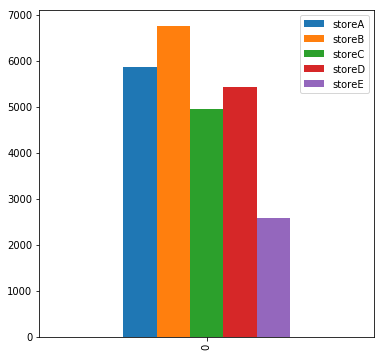

In [628]:
## plot distribution of stores average sales
stores=list(df.mean().keys())
# list((df.mean().values.round(1)))
avg_sales=list(df.mean().values)
avg_sales=[round(num,0) for num in avg_sales]

# turn avg_sales and stores into dataframe for plotting
avg_sales_byStores=dict(zip(stores,avg_sales))
# print(avg_sales_byStores)
sales_avg=pd.DataFrame([avg_sales_byStores])
print(sales_avg)
sales_avg.plot(kind='bar', figsize=(6,6));

mean_values= dict(sales_avg.mean().sort_values())
max_mean=max(mean_values.values())

print('\nHighest avg sales: ', list(mean_values.keys())[list(mean_values.values()).index(max_mean)])

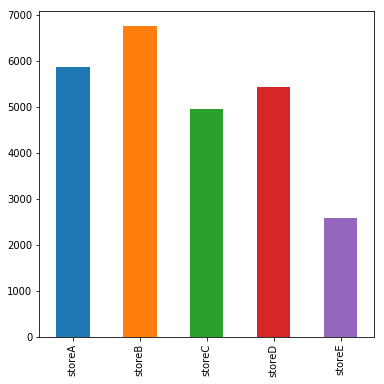

In [629]:
# alternative plotting and easier
df.mean().plot(kind='bar', figsize=(6,6));

### sales on march 13, 2016

Strore with best sales in March 13, 2016: storeD
Strore with worst sales in March 13, 2016: storeB


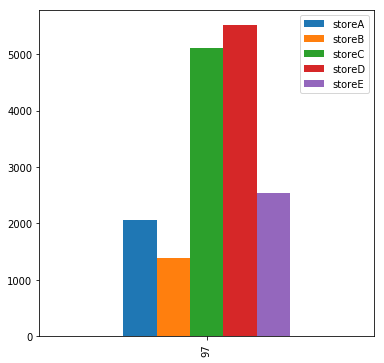

In [630]:
march13_sales= df[df['week']=='2016-03-13']
march13_sales=(march13_sales.drop('week', axis=1))
march13_sales.plot(kind='bar', figsize=(6,6))

march13_dict = dict(march13_sales.max())

bestSales_march13 = list(march13_dict.keys())[list(march13_dict.values()).index(max(march13_dict.values()))]
worstSales_march13 = list(march13_dict.keys())[list(march13_dict.values()).index(min(march13_dict.values()))]

print('Strore with best sales in March 13, 2016:', bestSales_march13)
print('Strore with worst sales in March 13, 2016:', worstSales_march13)

### worst week for store C


Distribution of StoreC Sales Figures


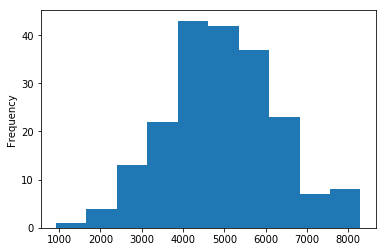

In [631]:
df['storeC'].plot(kind='hist');
print('Distribution of StoreC Sales Figures')
storeC_worseWeek = df['week'][df['storeC']==df['storeC'].min()].reset_index(drop=True).tolist()[0]
# df[df['storeC']==df['storeC'].min()]

In [632]:
print('Store C worst sales week is :', storeC_worseWeek)

Store C worst sales week is : 2014-07-06 00:00:00


### total sales during most recent 3 month period


In [633]:
# mask sales data of last 3-months
# df['year']=pd.DatetimeIndex(df['week']).year
# df['month'] = pd.DatetimeIndex(df['week']).month

In [634]:
# df['year_month']= df['year'].astype(str)+'-'+df['month'].astype(str)
df.tail()

,week,storeA,storeB,storeC,storeD,storeE
195,2018-01-28,282,6351,7759,5558,1028
196,2018-02-04,4853,6503,4187,5956,1458
197,2018-02-11,9202,3677,4540,6186,243
198,2018-02-18,3512,7511,4151,5596,3501
199,2018-02-25,7560,6904,3569,5045,2585


In [635]:

# df['year_month']=pd.to_datetime(df['year_month'],format=['y','m'])
# help(pd.date_range)

In [636]:
last3Month_sales = df[df['week']>='2017-11-30']

In [637]:
last3Month_sales.shape
last3Month_sales

,week,storeA,storeB,storeC,storeD,storeE
187,2017-12-03,5179,3850,6121,6778,113
188,2017-12-10,9348,5624,5446,5448,227
189,2017-12-17,5310,8647,5680,7049,3578
190,2017-12-24,8976,9503,6240,3882,2890
191,2017-12-31,11875,1527,6711,5265,1701
192,2018-01-07,8978,11312,4158,5019,3842
193,2018-01-14,6963,4014,4215,7153,3097
194,2018-01-21,5553,3971,3761,6255,3071
195,2018-01-28,282,6351,7759,5558,1028
196,2018-02-04,4853,6503,4187,5956,1458


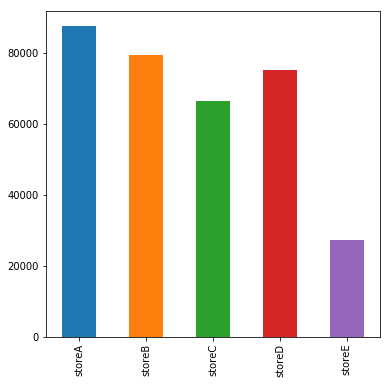

In [638]:
#plot last 3 month sales

last3Month_sales.sum().plot(kind='bar', figsize=(6,6))

In [639]:
#total sales
general_sales=last3Month_sales.sum().sum()

In [640]:
general_sales

336047

In [641]:
gen_sales=f'General Sales for past 3 months is {general_sales}'
print(gen_sales)

General Sales for past 3 months is 336047
